In [3]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=29bca3afd9b264056d3287fa6d1ba205


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

39.635421128437685 35.83148495309152
-26.66219010733934 38.000376277710814
-76.63332596810366 -147.68494213599286
-44.166199809778334 -118.6940224100485
18.631735725438602 49.610198521162545
-86.10284862136622 -172.743516390655
-72.3516865277158 -47.96903760083572
-4.396610664702152 -161.6092816298418
-19.393383044762643 94.93796481343986
-71.58565625440065 -43.26036789634247
57.24032680552327 178.77246583824603
78.12889397560409 -156.90175759702294
-19.27076492499515 -20.376533142085037
-76.28674839618922 20.78881034646062
85.14009954799312 -78.0062704293986
42.55481743250198 57.564797021347744
46.17991761745154 -142.13729512739178
8.727493404761688 -112.31965895707424
-6.782923959441604 -159.02323791650616
-78.33891802806157 -90.69868506309132
7.832677518115574 -93.81544182876087
-80.74580043825272 13.920175071265817
-66.78734310330549 43.466238789196666
-2.070274873262264 -25.613292161448925
-32.34396249567408 -45.04997025863943
46.4277228040265 99.13823292489911
-81.84436378011192 

71.12400847585201 -53.43853244872679
86.41962898831454 -48.43265542910146
42.49035911542211 -15.239527461818739
-35.855601762644355 64.24279676386237
-7.917876962139417 109.7652303307865
-13.658104339334898 140.58702073064052
-39.98683698253734 155.6069813392292
-11.95133079019375 -125.72458400606052
84.97763863389008 -69.52512153118096
-24.15775282717314 156.70685623622973
46.871539643330635 43.00427072683769
79.40609098434012 86.10315660309828
17.540298925521498 159.50060509637046
-76.44672624720431 -33.4622114245619
41.71491720510477 -134.50332752231674
7.109199742284645 -154.7511263643238
-75.48588228370906 22.484728996682833
38.813708214530976 -146.83007921521965
-24.068426047898285 -13.375474591487773
-35.537696253822695 -1.0889453909715598
56.287936895424195 165.50174863179893
-15.97547805699898 172.9855096065591
23.1775190317979 170.29439088491193
-79.13977245794878 -14.872806765326573
25.0671104293276 -92.85650499002809
-31.7987547844777 -143.09058613423673
65.64645840482746 1

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | akdagmadeni
Processing Record 2 of Set 1 | inhambane
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | samusu
City not found. Skipping...
Processing Record 9 of Set 1 | labuhan
Processing Record 10 of Set 1 | beringovskiy
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | akdepe
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | champerico
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | natal
Processing Record

Processing Record 36 of Set 4 | keti bandar
Processing Record 37 of Set 4 | najran
Processing Record 38 of Set 4 | high rock
Processing Record 39 of Set 4 | nabire
Processing Record 40 of Set 4 | chanika
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | longhua
Processing Record 43 of Set 4 | kupang
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | mandello del lario
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | nikolskoye
Processing Record 48 of Set 4 | warqla
City not found. Skipping...
Processing Record 49 of Set 4 | havoysund
Processing Record 50 of Set 4 | manjacaze
Processing Record 1 of Set 5 | djibo
Processing Record 2 of Set 5 | svetlaya
Processing Record 3 of Set 5 | khvoynaya
Processing Record 4 of Set 5 | rajauri
Processing Record 5 of Set 5 | zemio
Processing Record 6 of Set 5 | ranong
Processing Record 7 of Set 5 | waingapu
Processing Record 8 of Set 5 | yar-sale
Processing Record 9 of Set 5 | port macq

Processing Record 31 of Set 8 | nishihara
Processing Record 32 of Set 8 | barao de melgaco
Processing Record 33 of Set 8 | muroto
Processing Record 34 of Set 8 | high level
Processing Record 35 of Set 8 | sinnamary
Processing Record 36 of Set 8 | bara
Processing Record 37 of Set 8 | pimentel
Processing Record 38 of Set 8 | saint-pierre
Processing Record 39 of Set 8 | nandigama
Processing Record 40 of Set 8 | sovetskiy
Processing Record 41 of Set 8 | sangin
Processing Record 42 of Set 8 | mount isa
Processing Record 43 of Set 8 | monitos
Processing Record 44 of Set 8 | itoman
Processing Record 45 of Set 8 | bama
Processing Record 46 of Set 8 | ahipara
Processing Record 47 of Set 8 | nyurba
Processing Record 48 of Set 8 | pangnirtung
Processing Record 49 of Set 8 | chabahar
Processing Record 50 of Set 8 | caravelas
Processing Record 1 of Set 9 | morant bay
Processing Record 2 of Set 9 | gobabis
Processing Record 3 of Set 9 | santa vitoria do palmar
Processing Record 4 of Set 9 | yulara
P

Processing Record 18 of Set 12 | isla mujeres
Processing Record 19 of Set 12 | tabialan
City not found. Skipping...
Processing Record 20 of Set 12 | tilichiki
Processing Record 21 of Set 12 | miandoab
Processing Record 22 of Set 12 | saint-joseph
Processing Record 23 of Set 12 | hvammstangi
City not found. Skipping...
Processing Record 24 of Set 12 | lagoa
Processing Record 25 of Set 12 | marystown
Processing Record 26 of Set 12 | la ronge
Processing Record 27 of Set 12 | malmyzh
Processing Record 28 of Set 12 | kisangani
Processing Record 29 of Set 12 | maniwaki
Processing Record 30 of Set 12 | komsomolskiy
Processing Record 31 of Set 12 | xai-xai
Processing Record 32 of Set 12 | kismayo
Processing Record 33 of Set 12 | cap-aux-meules
Processing Record 34 of Set 12 | balagunan
Processing Record 35 of Set 12 | sukhobuzimskoye
Processing Record 36 of Set 12 | san-pedro
Processing Record 37 of Set 12 | binucayan
Processing Record 38 of Set 12 | alice springs
Processing Record 39 of Set 1

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Akdagmadeni,TR,2022-06-07 01:19:04,39.6603,35.8836,51.08,97,38,3.89
1,Inhambane,MZ,2022-06-07 01:19:05,-23.8650,35.3833,69.22,67,100,12.08
2,Mataura,NZ,2022-06-07 01:19:05,-46.1927,168.8643,53.49,67,85,2.59
3,Rikitea,PF,2022-06-07 01:19:05,-23.1203,-134.9692,71.60,67,1,17.76
4,Salalah,OM,2022-06-07 01:19:06,17.0151,54.0924,84.29,70,75,4.61
5,Vaini,TO,2022-06-07 01:19:06,-21.2000,-175.2000,78.96,61,20,13.80
6,Ushuaia,AR,2022-06-07 01:19:07,-54.8000,-68.3000,38.86,48,20,12.66
7,Labuhan,ID,2022-06-07 01:19:07,-6.8844,112.2051,80.42,80,91,5.59
8,Beringovskiy,RU,2022-06-07 01:19:08,63.0500,179.3167,38.89,89,86,5.39
9,Barrow,US,2022-06-07 01:19:08,71.2906,-156.7887,28.42,86,100,16.11


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

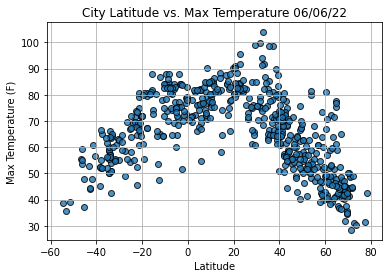

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


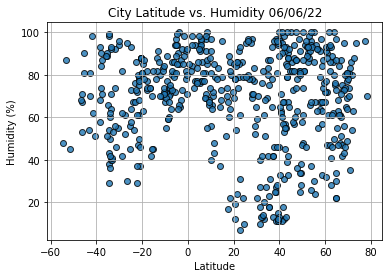

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

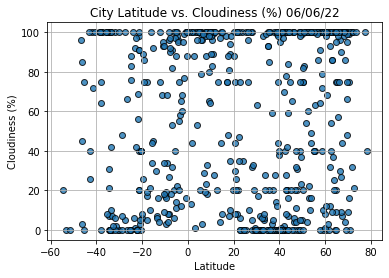

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

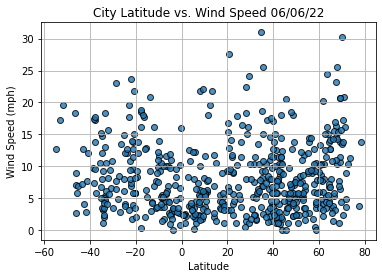

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()